In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
import keras

In [3]:
tf.keras.datasets.mnist.load_data(path=r"C:\Users\U1012152\Downloads\mnist.npy")

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [83]:
mnist_files = np.load(r"C:\Users\U1012152\Downloads\mnist.npy")
X_train = mnist_files['x_train'][0:30000]
y_train = mnist_files['y_train'][0:30000]
X_test = mnist_files['x_test'][0:30000]
y_test = mnist_files['y_test'][0:30000]
    

In [84]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(30000, 28, 28) (30000,) (10000, 28, 28) (10000,)


In [85]:
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

y_train_ind = np.where( ((y_train==8) | (y_train==9)))[0]
y_test_ind = np.where( ((y_test==8) | (y_test==9)))[0]
X_train = X_train[y_train_ind, :]
X_test = X_test[y_test_ind, :]
y_train = y_train[y_train_ind, :]
y_test = y_test[y_test_ind, :]

y_train_modified = np.where(y_train == 8, 0, 1)
y_test_modified = np.where(y_test == 8, 0, 1)

In [100]:
y_train_modified

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [72]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(5878, 784) (5878, 1) (1983, 784) (1983, 1)


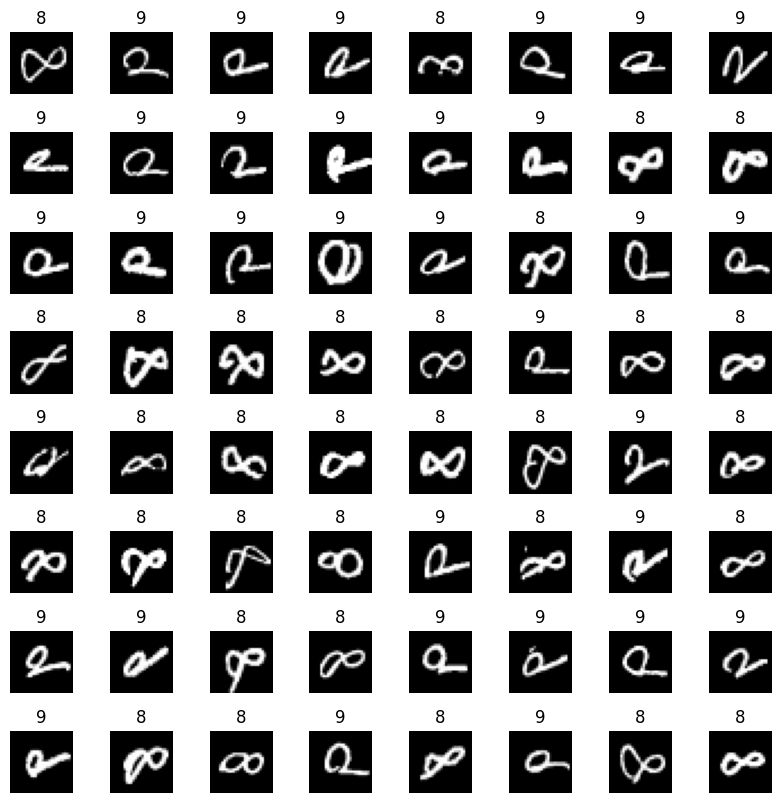

In [73]:
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train[random_index,0])
    ax.set_axis_off()

In [74]:
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell
def plot_image(random_index):
    m, n = X_train.shape
    plt.figure(figsize=(3,3))
    X_random_reshaped = X_train[random_index].reshape((28,28)).T

    # Display the image
    plt.imshow(X_random_reshaped, cmap='gray')

    # Display the label above the image
    plt.title(y_train[random_index,0])
    plt.axis('off')




In [91]:
# UNQ_C1
# GRADED CELL: Sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),    #specify input size
        ### START CODE HERE ### 
        Dense(50,activation='relu'),
        Dense(25,activation='relu'), 
        Dense(15,activation='relu'),
        Dense(units=1, activation="sigmoid")
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)       


# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.0001),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)
history = model.fit(
    X_train,y_train_modified,
    epochs=20,validation_split=0.3,callbacks=[es]
)





Epoch 1/20
129/129 [==============================] - 3s 6ms/step - loss: 12.8819 - binary_accuracy: 0.6988 - val_loss: 1.4111 - val_binary_accuracy: 0.8946
Epoch 2/20
129/129 [==============================] - 1s 4ms/step - loss: 1.0384 - binary_accuracy: 0.9217 - val_loss: 0.6746 - val_binary_accuracy: 0.9444
Epoch 3/20
129/129 [==============================] - 1s 4ms/step - loss: 0.5617 - binary_accuracy: 0.9509 - val_loss: 0.4718 - val_binary_accuracy: 0.9563
Epoch 4/20
129/129 [==============================] - 0s 4ms/step - loss: 0.3801 - binary_accuracy: 0.9614 - val_loss: 0.4011 - val_binary_accuracy: 0.9603
Epoch 5/20
129/129 [==============================] - 0s 4ms/step - loss: 0.2775 - binary_accuracy: 0.9703 - val_loss: 0.3748 - val_binary_accuracy: 0.9626
Epoch 6/20
129/129 [==============================] - 0s 4ms/step - loss: 0.2026 - binary_accuracy: 0.9767 - val_loss: 0.3438 - val_binary_accuracy: 0.9654
Epoch 7/20
129/129 [==============================] - 0s 4ms/st

In [93]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 50)                39250     
                                                                 
 dense_34 (Dense)            (None, 25)                1275      
                                                                 
 dense_35 (Dense)            (None, 15)                390       
                                                                 
 dense_36 (Dense)            (None, 1)                 16        
                                                                 
Total params: 40,931
Trainable params: 40,931
Non-trainable params: 0
_________________________________________________________________


In [63]:
L1_num_params = 784 * 50 + 50  # W1 parameters  + b1 parameters
L2_num_params = 784 * 25 + 25  # W1 parameters  + b1 parameters
L3_num_params = 25 * 15 + 15   # W2 parameters  + b2 parameters
L4_num_params = 15 * 1 + 1     # W3 parameters  + b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params,",  L4 params = ", L4_num_params )

L1 params =  39250 , L2 params =  19625 ,  L3 params =  390 ,  L4 params =  16


In [64]:
[layer1, layer2, layer3, layer4] = model.layers

In [65]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
W4,b4 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 50), b1 shape = (50,)
W2 shape = (50, 25), b2 shape = (25,)
W3 shape = (25, 15), b3 shape = (15,)


In [66]:
print(model.layers[2].weights)

[<tf.Variable 'L3/kernel:0' shape=(25, 15) dtype=float32, numpy=
array([[ 0.15080273, -0.15241228, -0.37386337,  0.25566143, -0.13078913,
         0.1415143 ,  0.25281835,  0.00834394,  0.25753868, -0.33041346,
        -0.04524294, -0.18438682,  0.23828948,  0.12076664,  0.05956575],
       [ 0.286654  ,  0.32366645, -0.16735265,  0.05964932,  0.07489875,
         0.34002995,  0.02544507, -0.2247523 ,  0.04116321, -0.09213451,
         0.1435445 , -0.27501565,  0.35169923, -0.07801595, -0.11155766],
       [-0.35397425,  0.00664824, -0.17061758,  0.2124992 ,  0.0183911 ,
        -0.25570014, -0.19931372,  0.05669567,  0.0485675 ,  0.18216026,
         0.33607203,  0.32663375, -0.24724954,  0.29805976,  0.2872635 ],
       [ 0.33662105,  0.18388116,  0.11171529, -0.3391133 , -0.06121391,
        -0.04478651,  0.00813997, -0.3104009 ,  0.04484487,  0.13561302,
        -0.16937156, -0.01888484,  0.14052194,  0.02221957, -0.23302904],
       [-0.28865606, -0.11183238,  0.01137379,  0.15178

Epoch 1/40


282/282 [==============================] - 2s 3ms/step - loss: 0.4239 - categorical_accuracy: 0.0961 - val_loss: 0.8740 - val_categorical_accuracy: 0.1070
Epoch 2/40
282/282 [==============================] - 1s 3ms/step - loss: 0.3883 - categorical_accuracy: 0.0961 - val_loss: 0.8497 - val_categorical_accuracy: 0.1100
Epoch 3/40
282/282 [==============================] - 1s 2ms/step - loss: 0.3645 - categorical_accuracy: 0.0961 - val_loss: 0.8501 - val_categorical_accuracy: 0.1040
Epoch 3: early stopping


1/1 [==============================] - 0s 195ms/step
 predicting a five: [[1.]]
1/1 [==============================] - 0s 37ms/step
 predicting a three:  [[2.6274114e-31]]


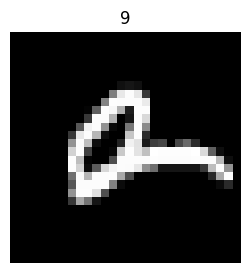

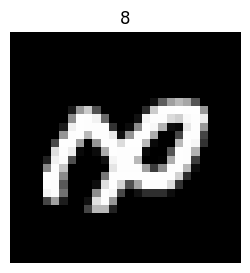

In [94]:
plot_image(0)
prediction = model.predict(X_train[0].reshape(1,784))  # a five
print(f" predicting a five: {prediction}")
plot_image(500)
prediction = model.predict(X_train[500].reshape(1,784))  # a three
print(f" predicting a three:  {prediction}")

1/1 [==============================] - 0s 118ms/step
 predicting a eight: 
[[-0.2610836   9.056575    5.596756    6.2182145   3.481247   -0.32402194
   1.1224864   4.4559145  10.629636    1.4737206 ]]
 Largest Prediction index: 8


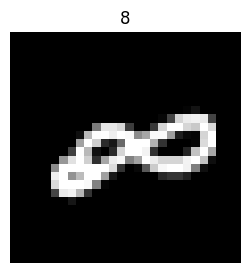

In [50]:
image_of_two = X_train[300]
plot_image(300)

prediction = model.predict(image_of_two.reshape(1,784))  # prediction
print(f" predicting a eight: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

1/1 [==============================] - 0s 26ms/step


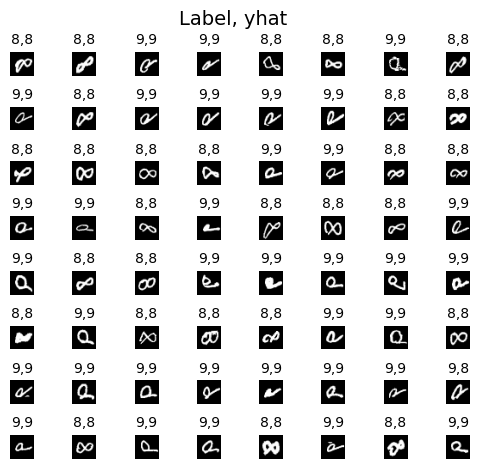

In [112]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
#widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X_train[random_index].reshape(1,784))
    
    if prediction>=0.5:
        yhat = 9
    else:
        yhat = 8
    
    # Display the label above the image
    ax.set_title(f"{y_train[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>

In [121]:
model_pred = model.predict(X_test)
yhat = np.where(model_pred >= 0.5, 1, 0).reshape(X_test.shape[0],1)

62/62 [==============================] - 0s 2ms/step


In [117]:
y_test_modified.shape

(1983, 1)

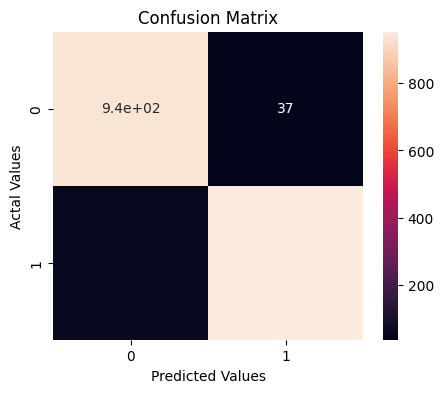

In [122]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
cm = confusion_matrix(y_test_modified, yhat)
cm_df = pd.DataFrame(cm,
                     index = ['0','1'], 
                     columns = ['0','1'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [126]:
cm = confusion_matrix(y_test_modified, yhat)

recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)
print("recall - ", recall)
print("precision - ", precision)
#Now the normalize the diagonal entries
cm_accuracy = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
accuracy = cm_accuracy.diagonal()
print("Accuracy ",accuracy )

recall -  [0.96201232 0.9444995 ]
precision -  [0.94360524 0.96262626]
Accuracy  [0.96201232 0.9444995 ]


In [127]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test_modified, yhat)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.94360524 0.96262626]
recall: [0.96201232 0.9444995 ]
fscore: [0.95271988 0.95347674]
support: [ 974 1009]


In [128]:
#classification report

report = classification_report(y_test_modified,yhat, output_dict=True)

df = pd.DataFrame(report).transpose()

df

,precision,recall,f1-score,support
0,0.943605,0.962012,0.952720,974.000000
1,0.962626,0.944500,0.953477,1009.000000
accuracy,0.953101,0.953101,0.953101,0.953101
macro avg,0.953116,0.953256,0.953098,1983.000000
weighted avg,0.953284,0.953101,0.953105,1983.000000


In [129]:
#over all precision recall accuracy
print("Overall Precision",np.mean(precision))
print("Overall Recall ",np.mean(recall))
print("Overall fscore ", np.mean(fscore))
print("Overall accuracy ", np.mean(accuracy))


Overall Precision 0.9531157496414293
Overall Recall  0.9532559123942017
Overall fscore  0.9530983081779831
Overall accuracy  0.9532559123942017


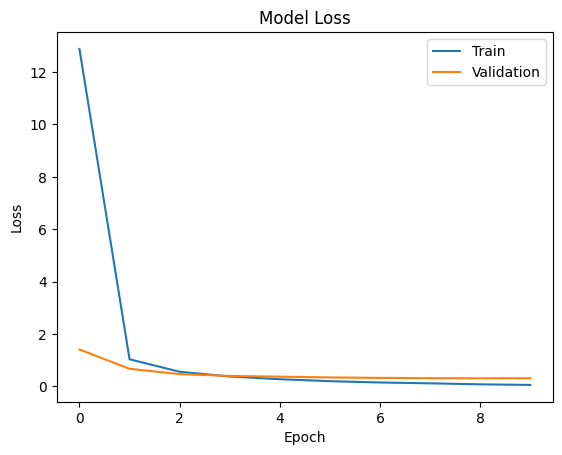

In [130]:
#Training loss
history.history['loss']
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')